# Exercise 17

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
tweets = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [3]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [4]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

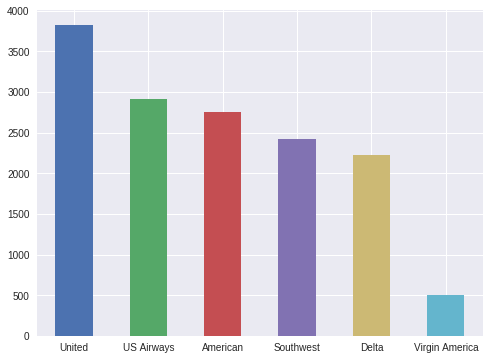

In [5]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

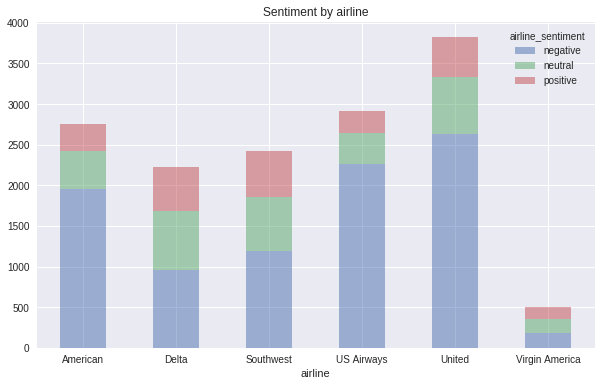

In [6]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 17.1 

Predict the sentiment using CountVectorizer

use Random Forest classifier

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from yellowbrick.text.freqdist import FreqDistVisualizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [0]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [0]:
vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(X)
features = vectorizer.get_feature_names() 
X_train, X_test, y_train, y_test = train_test_split(docs, y, test_size=0.3,random_state=123)


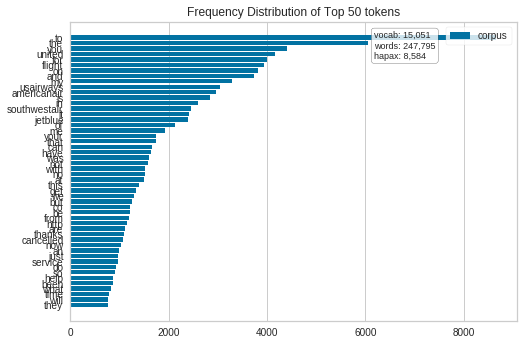

In [10]:
visualizer = FreqDistVisualizer(features = features)
visualizer.fit(docs)
visualizer.poof()

In [11]:
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [12]:
rf=RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
y_pred = rf.predict(X_test)
metrics.accuracy_score(y_pred, y_test)

0.7340619307832422

In [14]:
print(pd.Series(cross_val_score(rf, docs, y, cv=10, n_jobs=-1)).describe())

count    10.000000
mean      0.710039
std       0.021732
min       0.655055
25%       0.706507
50%       0.715505
75%       0.719576
max       0.737705
dtype: float64


# Exercise 17.2 

Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

In [0]:
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(X)
features = vectorizer.get_feature_names() 
X_train, X_test, y_train, y_test = train_test_split(docs, y, test_size=0.3,random_state=123)


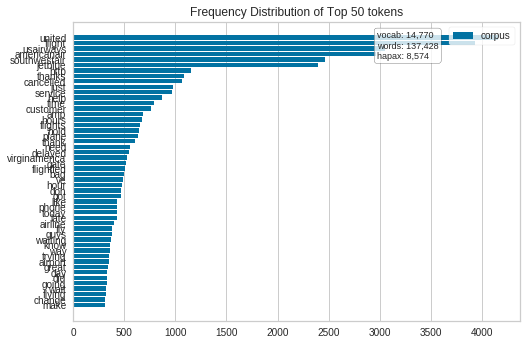

In [16]:
visualizer = FreqDistVisualizer(features = features)
visualizer.fit(docs)
visualizer.poof()

In [17]:
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [18]:
rf=RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
y_pred = rf.predict(X_test)
metrics.accuracy_score(y_pred, y_test)

0.7317850637522769

In [20]:
print(pd.Series(cross_val_score(rf, docs, y, cv=10,n_jobs=-1)).describe())

count    10.000000
mean      0.699996
std       0.037665
min       0.630464
25%       0.697746
50%       0.703113
75%       0.707629
max       0.774590
dtype: float64


# Exercise 17.3

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

In [0]:
vectorizer = CountVectorizer(ngram_range=(1,2))
docs = vectorizer.fit_transform(X)
features = vectorizer.get_feature_names() 
X_train, X_test, y_train, y_test = train_test_split(docs, y, test_size=0.3,random_state=123)

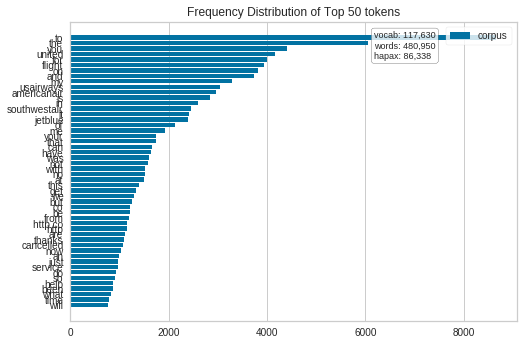

In [22]:
visualizer = FreqDistVisualizer(features = features)
visualizer.fit(docs)
visualizer.poof()

In [23]:
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [24]:
rf=RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
y_pred = rf.predict(X_test)
metrics.accuracy_score(y_pred, y_test)

0.7443078324225865

In [26]:
print(pd.Series(cross_val_score(rf, docs, y, cv=10,n_jobs=-1)).describe())

count    10.000000
mean      0.710655
std       0.020991
min       0.671448
25%       0.705290
50%       0.708575
75%       0.721995
max       0.750683
dtype: float64


In [0]:
vectorizer = CountVectorizer(ngram_range=(1,4),stop_words='english')
docs = vectorizer.fit_transform(X)
features = vectorizer.get_feature_names() 
X_train, X_test, y_train, y_test = train_test_split(docs, y, test_size=0.3,random_state=123)

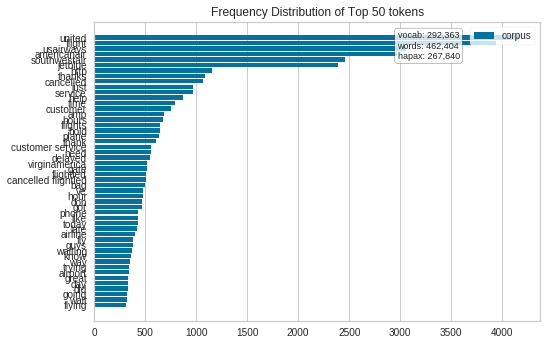

In [28]:
visualizer = FreqDistVisualizer(features = features)
visualizer.fit(docs)
visualizer.poof()

In [29]:
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 4), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [30]:
rf=RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
y_pred = rf.predict(X_test)
metrics.accuracy_score(y_pred, y_test)

0.7299635701275046

In [32]:
print(pd.Series(cross_val_score(rf, docs, y, cv=10,n_jobs=-1)).describe())

count    10.000000
mean      0.688865
std       0.039765
min       0.603142
25%       0.676913
50%       0.692150
75%       0.703812
max       0.757514
dtype: float64


# Exercise 17.4

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

In [0]:
tf_vectorizer = TfidfVectorizer()
docs = tf_vectorizer.fit_transform(X)
features = tf_vectorizer.get_feature_names() 
X_train, X_test, y_train, y_test = train_test_split(docs, y, test_size=0.3,random_state=123)

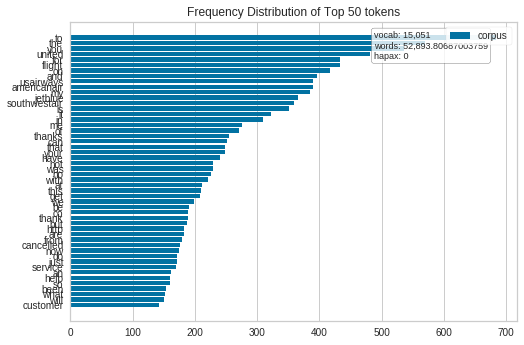

In [34]:
visualizer = FreqDistVisualizer(features = features)
visualizer.fit(docs)
visualizer.poof()

In [35]:
tf_vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [36]:
rf=RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
y_pred = rf.predict(X_test)
metrics.accuracy_score(y_pred, y_test)

0.7377049180327869

In [38]:
print(pd.Series(cross_val_score(rf, docs, y, cv=10, n_jobs=-1)).describe())

count    10.000000
mean      0.703755
std       0.023681
min       0.653689
25%       0.696119
50%       0.705702
75%       0.711628
max       0.750000
dtype: float64
